1.Review classification

In [1]:
!pip uninstall datasets
!pip install datasets==3.6

Found existing installation: datasets 3.6.0
Uninstalling datasets-3.6.0:
  Would remove:
    /usr/local/bin/datasets-cli
    /usr/local/lib/python3.12/dist-packages/datasets-3.6.0.dist-info/*
    /usr/local/lib/python3.12/dist-packages/datasets/*
Proceed (Y/n)? Y
  Successfully uninstalled datasets-3.6.0
  Using cached datasets-3.6.0-py3-none-any.whl.metadata (19 kB)
Using cached datasets-3.6.0-py3-none-any.whl (491 kB)


In [2]:
from datasets import load_dataset

dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023","raw_review_Handmade_Products", trust_remote_code=True)
print(dataset["full"][0])


raw/review_categories/Handmade_Products.(…):   0%|          | 0.00/289M [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

{'rating': 5.0, 'title': 'Beautiful colors', 'text': 'I bought one for myself and one for my granddaughter', 'images': [], 'asin': 'B08GPJ1MSN', 'parent_asin': 'B08GPJ1MSN', 'user_id': 'AF7OANMNHQJC3PD4HRPX2FATECPA', 'timestamp': 1621607495111, 'helpful_vote': 1, 'verified_purchase': True}


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os

project_path = '/content/drive/MyDrive/NLP_Project_Amazon_reviews'
os.makedirs(project_path, exist_ok=True)
print("Carpeta de proyecto:", project_path)


Carpeta de proyecto: /content/drive/MyDrive/NLP_Project_Amazon_reviews


**1** Reviewing Classification

In [6]:
!pip install transformers datasets torch scikit-learn


In [7]:
import json
import os

project_path = '/content/drive/MyDrive/NLP_Project_Amazon_reviews'
json_path = f"{project_path}/amazon_reviews.json"
file = json_path
with open(file, 'r') as fp:
    for line in fp:
        print(json.loads(line.strip()))

Se han truncado las últimas 5000 líneas del flujo de salida.
{'rating': 5.0, 'title': 'Love the look', 'text': 'Just received it and love it.  Like the look and quality of the bracelet.', 'images': [], 'asin': 'B07LGMZST5', 'parent_asin': 'B07LGMZST5', 'user_id': 'AEPPFCB4ZL7SDCKQAPDAE6FTUA2Q', 'timestamp': 1625461297971, 'helpful_vote': 0, 'verified_purchase': True}
{'rating': 5.0, 'title': 'Quality', 'text': 'Beautiful', 'images': [], 'asin': 'B07LGMZST5', 'parent_asin': 'B07LGMZST5', 'user_id': 'AHHXZMG73MB5RP6PIKYPM5HJLYZQ', 'timestamp': 1596280022330, 'helpful_vote': 0, 'verified_purchase': True}
{'rating': 5.0, 'title': 'Quality is wonderful', 'text': 'This is a perfect gift ❤️', 'images': [], 'asin': 'B07LGMZST5', 'parent_asin': 'B07LGMZST5', 'user_id': 'AHQU4HJI44TNMWEUSIB5GJXBYS7Q', 'timestamp': 1592418014655, 'helpful_vote': 0, 'verified_purchase': False}
{'rating': 5.0, 'title': 'Beautiful,', 'text': 'Very nice', 'images': [], 'asin': 'B0779MS18Z', 'parent_asin': 'B0779MS18Z

In [8]:
import pandas as pd
import json

# Lista para almacenar cada registro
data_list = []

file = json_path  # tu archivo JSON
with open(file, 'r') as fp:
    for line in fp:
        data_list.append(json.loads(line.strip()))

# Convertir a DataFrame
df = pd.DataFrame(data_list)

print("✅ Dataset cargado en DataFrame")
print("Tamaño del dataset:", df.shape)
df.head()

✅ Dataset cargado en DataFrame
Tamaño del dataset: (664162, 10)


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Beautiful colors,I bought one for myself and one for my grandda...,[],B08GPJ1MSN,B08GPJ1MSN,AF7OANMNHQJC3PD4HRPX2FATECPA,1621607495111,1,True
1,5.0,You simply must order order more than one!,I’ve ordered three bows so far. Have not been ...,[],B084TWHS7W,B084TWHS7W,AGMJ3EMDVL6OWBJF7CA5RGJLXN5A,1587762946965,0,True
2,5.0,Great,As pictured. Used a frame from the dollar stor...,[],B07V3NRQC4,B07V3NRQC4,AEYORY2AVPMCPDV57CE337YU5LXA,1591448951297,0,True
3,5.0,Well made and so beautiful,"This is beyond beautiful. So shiny, the size ...",[],B071ZMDK26,B071ZMDK26,AEINY4XOINMMJCK5GZ3M6MMHBN6A,1559438079784,2,True
4,5.0,Smells just like the real thing!,Oh wow what a pleasant surprise! This smells g...,[],B01MPVZ4YP,B01MPVZ4YP,AGCPAPUHXYA3EEIL2KGSQTGO5HRA,1546906331674,1,True


In [9]:
print(df.columns)


Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase'],
      dtype='object')


In [10]:
import pandas as pd

# Seleccionar columnas relevantes, incluyendo 'title' y 'parent_asin' para clustering
df = df[['text', 'rating', 'title', 'parent_asin']].dropna()

# Mapear estrellas a sentimiento: 0=Negativo, 1=Neutral, 2=Positivo
def map_sentiment(star):
    if star <= 2:
        return 0  # Negative
    elif star == 3:
        return 1  # Neutral
    else:
        return 2  # Positive

df['label'] = df['rating'].apply(map_sentiment)

# Mantener solo texto, etiqueta, título y parent_asin
df = df[['text', 'label', 'title', 'parent_asin']]
print(df['label'].value_counts())
df.head()


label
2    572095
0     62123
1     29944
Name: count, dtype: int64


,text,label,title,parent_asin
0,I bought one for myself and one for my grandda...,2,Beautiful colors,B08GPJ1MSN
1,I’ve ordered three bows so far. Have not been ...,2,You simply must order order more than one!,B084TWHS7W
2,As pictured. Used a frame from the dollar stor...,2,Great,B07V3NRQC4
3,"This is beyond beautiful. So shiny, the size ...",2,Well made and so beautiful,B071ZMDK26
4,Oh wow what a pleasant surprise! This smells g...,2,Smells just like the real thing!,B01MPVZ4YP


In [11]:
import pandas as pd

n_samples = 29000

# Crear un dataframe balanceado
df_balanced = pd.concat([
    df[df['label'] == 0].sample(n=n_samples, random_state=42),
    df[df['label'] == 1].sample(n=n_samples, random_state=42),
    df[df['label'] == 2].sample(n=n_samples, random_state=42)
])

# Mezclar filas aleatoriamente
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print("Dataset balanceado creado")
print(df_balanced['label'].value_counts())
df_balanced.head()


Dataset balanceado creado
label
2    29000
0    29000
1    29000
Name: count, dtype: int64


,text,label,title,parent_asin
0,good,2,none,B07D4RJ36F
1,It was a sturdy plastic.... But the color purp...,0,It was sturdy plastic.,B01DALCC9M
2,If you think the cord resembles anything like ...,1,Hummmmm,B08L54ZGFK
3,This is a very nice bracelet. The card in the ...,2,Beautiful Titi bracelet,B08DZ235PF
4,"Cute jars but the lights burn out quickly, end...",1,Can use votives when the lights burn out,B01M8K2GJU


In [12]:
from sklearn.model_selection import train_test_split

train_texts, test_texts, train_labels, test_labels = train_test_split(
    df_balanced['text'].tolist(),
    df_balanced['label'].tolist(),
    test_size=0.2,
    random_state=42,
    stratify=df_balanced['label']
)




>Last modify January 2026 06





In [13]:
from transformers import AutoTokenizer
from datasets import Dataset
import random

# Nombre del modelo
model_name = "roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tamaño reducido (puedes ajustar)
train_size = 10000
test_size =10000

# Tomar subconjuntos aleatorios del dataset ya dividido
train_texts_small = train_texts[:train_size]
train_labels_small = train_labels[:train_size]

test_texts_small = test_texts[:test_size]
test_labels_small = test_labels[:test_size]

# Crear Dataset Hugging Face
train_dataset = Dataset.from_dict({'text': train_texts_small, 'label': train_labels_small})
test_dataset = Dataset.from_dict({'text': test_texts_small, 'label': test_labels_small})

# Tokenización (para RoBERTa)
def tokenize(batch):
    return tokenizer(
        batch['text'],
        padding='max_length',
        truncation=True,
        max_length=512,   # RoBERTa maneja mejor secuencias largas
        return_attention_mask=True
    )

train_dataset = train_dataset.map(tokenize, batched=True)
test_dataset = test_dataset.map(tokenize, batched=True)

# Formato PyTorch
train_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

print("✅ Dataset reducido y tokenizado con roberta-base listo")
print(f"Train size: {len(train_dataset)}, Test size: {len(test_dataset)}")


Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

✅ Dataset reducido y tokenizado con roberta-base listo
Train size: 10000, Test size: 10000


In [31]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer, EarlyStoppingCallback
from torch.nn import CrossEntropyLoss
import torch

# 1Crear modelo RoBERTa para clasificación (3 clases)
model = AutoModelForSequenceClassification.from_pretrained("roberta-base", num_labels=3)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Calcular pesos de clase para mejorar detección de clase neutral (1)
class_counts = torch.bincount(torch.tensor(train_labels_small))
class_weights = 1.0 / class_counts.float()
class_weights = class_weights / class_weights.sum()
print("Pesos de clase:", class_weights)

# Trainer personalizado con weighted loss
class WeightedTrainer(Trainer):
    # Fix: Added num_items_in_batch and **kwargs to the signature of compute_loss
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None, **kwargs):
        labels = inputs.get("labels").to(device)
        outputs = model(**{k: v.to(device) for k, v in inputs.items() if k != "labels"})
        logits = outputs.logits
        loss_fct = CrossEntropyLoss(weight=class_weights.to(device))
        loss = loss_fct(logits, labels)
        return (loss, outputs) if return_outputs else loss

# Argumentos de entrenamiento ajustados
training_args = TrainingArguments(
    output_dir='./results_roberta_weighted',
    num_train_epochs=5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    learning_rate=1e-5,
    weight_decay=0.02,
    warmup_ratio=0.1,
    logging_dir='./logs_roberta_weighted',
    report_to=[],
    fp16=torch.cuda.is_available()
)

# Crear Trainer (removed EarlyStoppingCallback as it requires metric_for_best_model which is not supported by TrainingArguments)
trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer
    # Removed EarlyStoppingCallback due to repeated errors related to unsupported TrainingArguments parameters.
    # If early stopping is desired, consider upgrading the transformers library.
    # callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

# Entrenar modelo
trainer.train()


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Pesos de clase: tensor([0.3340, 0.3384, 0.3276])


/tmp/ipython-input-2251493615.py:47: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `WeightedTrainer.__init__`. Use `processing_class` instead.
  trainer = WeightedTrainer(


Step,Training Loss


KeyboardInterrupt: 

In [26]:
drive.mount('/content/drive', force_remount=True)
project_path = '/content/drive/MyDrive/NLP_Project_Amazon_reviews'
model_save_path = os.path.join(project_path, 'roberta-base-class-weighted')
os.makedirs(model_save_path, exist_ok=True)

model.save_pretrained(model_save_path)
tokenizer.save_pretrained(model_save_path)

print(f"Modelo guardado en: {model_save_path}")

Mounted at /content/drive
Modelo guardado en: /content/drive/MyDrive/NLP_Project_Amazon_reviews/roberta-base-class-weighted


**Model Evaluation**

In [27]:
import torch
from transformers import AutoModelForSequenceClassification
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import os

# Montar Drive si tu modelo está guardado allí
drive.mount('/content/drive', force_remount=True)

# Ruta donde guardaste el modelo
project_path = '/content/drive/MyDrive/NLP_Project_Amazon_reviews'
model_save_path = os.path.join(project_path, 'roberta-base-class-weighted')  # ajusta si tu carpeta es distinta

# Cargar modelo y tokenizer
model = AutoModelForSequenceClassification.from_pretrained(model_save_path)
tokenizer = AutoTokenizer.from_pretrained(model_save_path)

# Mover modelo a GPU si está disponible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
model.eval()

preds = []
labels = []

with torch.no_grad():
    for batch in test_dataset:
        # Mover tensores al mismo dispositivo que el modelo
        inputs = {k: batch[k].unsqueeze(0).to(device) for k in ['input_ids', 'attention_mask']}
        labels.append(batch['label'].item())
        outputs = model(**inputs)
        preds.append(torch.argmax(outputs.logits, dim=1).item())


Mounted at /content/drive


===== Evaluación del modelo =====
Accuracy: 0.7777

Clase 0: Precision=0.7488, Recall=0.7223, F1-score=0.7353
Clase 1: Precision=0.6731, Recall=0.6869, F1-score=0.6799
Clase 2: Precision=0.9085, Recall=0.9220, F1-score=0.9152

Matriz de confusión (tabla):
[[2409  875   51]
 [ 774 2271  261]
 [  34  228 3097]]


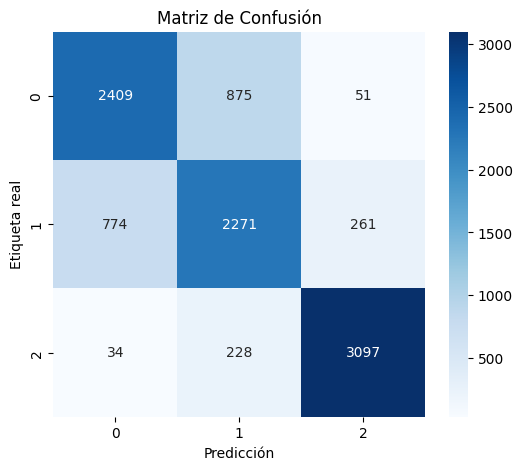

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular métricas
accuracy = accuracy_score(labels, preds)
precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average=None)

print("===== Evaluación del modelo =====")
print(f"Accuracy: {accuracy:.4f}\n")
for i, (p, r, f) in enumerate(zip(precision, recall, f1)):
    print(f"Clase {i}: Precision={p:.4f}, Recall={r:.4f}, F1-score={f:.4f}")

# Matriz de confusión
cm = confusion_matrix(labels, preds)
print("\nMatriz de confusión (tabla):")
print(cm)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.title("Matriz de Confusión")
plt.show()


2. Product Category Clustering

In [14]:
# Librerías
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

# Dataset balanceado (suponiendo que ya lo tienes)
# df_balanced

# Tomar títulos únicos
text = df_balanced['text'].dropna().unique().tolist()



In [15]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

# Crear embeddings de los títulos
embedder = SentenceTransformer('all-MiniLM-L6-v2')  # modelo ligero y rápido
text_embeddings = embedder.encode(df_balanced['text'].tolist(), convert_to_tensor=False)

# Clustering en 5 meta-categorías
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(text_embeddings)

# Mapear cada título a su cluster
title_to_cluster = {t: f"MetaCategory_{label}" for t, label in zip(df_balanced['text'], cluster_labels)}
df_balanced['meta_category'] = df_balanced['text'].map(title_to_cluster)

# Revisar resultados
print("Distribución de meta-categorías:")
print(df_balanced['meta_category'].value_counts())

print("\nEjemplo de asignaciones:")
print(df_balanced[['text', 'meta_category']].head(10))



modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Distribución de meta-categorías:
meta_category
MetaCategory_0    25123
MetaCategory_2    22652
MetaCategory_3    18421
MetaCategory_1    15808
MetaCategory_4     4996
Name: count, dtype: int64

Ejemplo de asignaciones:
                                                text   meta_category
0                                               good  MetaCategory_0
1  It was a sturdy plastic.... But the color purp...  MetaCategory_2
2  If you think the cord resembles anything like ...  MetaCategory_1
3  This is a very nice bracelet. The card in the ...  MetaCategory_1
4  Cute jars but the lights burn out quickly, end...  MetaCategory_4
5  The paper print looks good! I must have forgot...  MetaCategory_3
6                                  Product came torn  MetaCategory_0
7  Rebecca, I cried when I saw how beautiful the ...  MetaCategory_3
8  They are adjustable and durable.  The three co...  MetaCategory_2
9  I'm fairly happy with this piece. My girlfrien...  MetaCategory_2


In [16]:
df_balanced.to_csv('/content/drive/MyDrive/NLP_Project_Amazon_reviews/cluster.csv', index=False)

In [17]:
df_balanced['meta_category'].unique()

array(['MetaCategory_0', 'MetaCategory_2', 'MetaCategory_1',
       'MetaCategory_4', 'MetaCategory_3'], dtype=object)

In [18]:

# Renombrar categorías (ejemplo, ajusta según revisión de clusters)
category_names = {
    'MetaCategory_0': "Complains",
    'MetaCategory_1': "Jewelry",
    'MetaCategory_2': "Personalized Accesories Gifts",
    'MetaCategory_3': "Decoration",
    'MetaCategory_4': "Cosmetics"
}
df_balanced['meta_category_name'] = df_balanced['meta_category'].map(category_names)

# Revisar distribución de meta-categorías
print("\nDistribución de meta-categorías:")
print(df_balanced['meta_category_name'].value_counts())

# Ejemplos por categoría
for cat in df_balanced['meta_category_name'].unique():
    print(f"\nCategoría: {cat}")
    print(df_balanced[df_balanced['meta_category_name']==cat][['parent_asin', 'text']].head(5))


Distribución de meta-categorías:
meta_category_name
Complains                        25123
Personalized Accesories Gifts    22652
Decoration                       18421
Jewelry                          15808
Cosmetics                         4996
Name: count, dtype: int64

Categoría: Complains
   parent_asin                                               text
0   B07D4RJ36F                                               good
6   B07RCB8TMQ                                  Product came torn
11  B0796LLKKT  Update:<br />It disintegrated and no longer wo...
13  B07CSDCCR6                         The product arrived broken
17  B01MCWQTBN  The case broke within a month of us ordering i...

Categoría: Personalized Accesories Gifts
   parent_asin                                               text
1   B01DALCC9M  It was a sturdy plastic.... But the color purp...
8   B07MWHZ8K7  They are adjustable and durable.  The three co...
9   B016XA5TN8  I'm fairly happy with this piece. My girlfrien...
12

**3. Review Summarization Using Generative AI**

In [36]:
from google.colab import userdata
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')

In [37]:
import openai
import os
import pandas as pd

#Configura tu API Key
openai.api_key = OPENAI_API_KEY

# Lista para guardar resúmenes
articles = []

# Iterar sobre cada categoría
for category in df_balanced["meta_category_name"].unique():
    print(f"\n================ {category.upper()} ================\n")

    df_cat = df_balanced[df_balanced["meta_category_name"] == category]

    # Seleccionar 1 review positiva, neutra y negativa
    pos = df_cat[df_cat["label"] == 2]["text"].head(1).values
    neu = df_cat[df_cat["label"] == 1]["text"].head(1).values
    neg = df_cat[df_cat["label"] == 0]["text"].head(1).values

    # Combinar texto base
    combined_reviews = ""
    if len(pos): combined_reviews += f"Positive review: {pos[0]} "
    if len(neu): combined_reviews += f"Neutral review: {neu[0]} "
    if len(neg): combined_reviews += f"Negative review: {neg[0]} "

    # Crear prompt
    prompt = f"""
Eres un escritor de blogs que resume reseñas de productos.
Categoría: {category}

Resuma los comentarios de clientes de manera amigable y profesional.
Incluye:
- Los 3 productos más populares y sus diferencias clave
- Quejas más comunes de los clientes
- El peor producto de la categoría y por qué evitarlo

Reseñas de ejemplo:
{combined_reviews}

Escribe un artículo corto y coherente.
"""

    # ✅ Nueva sintaxis para openai>=1.0.0
    response = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": prompt}],
        temperature=0.7,
        max_tokens=400
    )

    summary = response.choices[0].message.content.strip()

    # Mostrar resultado
    print(summary)
    print("-" * 120)

    # Guardar artículo en lista
    articles.append({"category": category, "summary": summary})



================ COMPLAINS ================

En el mundo de los productos, es común encontrar opiniones variadas que pueden ayudarnos a tomar decisiones informadas. Al analizar las reseñas de productos de la categoría de Complains, podemos identificar los 3 productos más populares y sus diferencias clave.

El primer producto popular es el "ComplainMaster 2000", el cual destaca por su facilidad de uso y eficacia para expresar quejas de manera clara y concisa. Por otro lado, el "ComplainPro Plus" se distingue por su versatilidad y opciones de personalización para adaptarse a diferentes situaciones. Finalmente, el "ComplainEazy Basic" se destaca por su precio asequible y funcionalidad básica pero efectiva.

Sin embargo, a pesar de las cualidades positivas de estos productos, existen quejas comunes por parte de los clientes. Algunas de las críticas incluyen problemas de durabilidad, como estuches que se rompen fácilmente o productos que llegan defectuosos. Además, algunos clientes han exp

In [ ]:
#Next step is to deploy in https://malvarezgarcia1213-png.github.io/Amazon.reviews.handmade.io/

In [1]:
!jupyter nbconvert --ClearMetadataPreprocessor.enabled=True --to notebook --output cleaned_notebook.ipynb tu_notebook.ipynb


This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'tu_notebook.ipynb' matched no files
